In [0]:
#Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
df = pd.read_csv("SMS-Messages2.csv", encoding='utf-8')

In [0]:
df.head()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


In [0]:
df['Label'] = np.where(df['Class_Label']=='ham', '1', '0')
df.head()

,Message,Class_Label,Label
0,'Go until jurong point,ham,1
1,'Ok lar... Joking wif u oni...',ham,1
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,0
3,'U dun say so early hor... U c already then sa...,ham,1
4,'Nah I don\'t think he goes to usf,ham,1


Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of ham and spam messages')

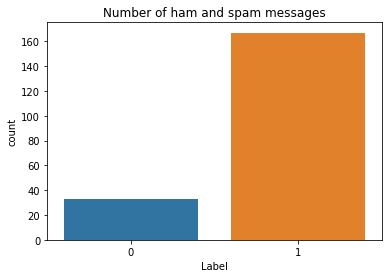

In [0]:
#Explore the class distribution
sns.countplot(df['Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [0]:
#Build the bow vector
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=145, stop_words='english')
x_bow = bow_vectorizer.fit_transform(df["Message"])
#print(bow_vectorizer.get_feature_names())
print(x_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_bow, df['Label'], random_state=42, test_size=0.3)

In [0]:
# create model
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
model=Sequential()
model.add(Dense(50,input_dim=145,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [0]:
#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# Fit the model on full training set
model.fit(xtrain,ytrain,epochs=10,batch_size=10, validation_data=(xtest, ytest))

Train on 140 samples, validate on 60 samples
Epoch 1/10
140/140 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.4214 - val_loss: 0.6870 - val_accuracy: 0.5500
Epoch 2/10
140/140 [==============================] - 0s 218us/step - loss: 0.6695 - accuracy: 0.7714 - val_loss: 0.6673 - val_accuracy: 0.7833
Epoch 3/10
140/140 [==============================] - 0s 203us/step - loss: 0.6344 - accuracy: 0.9143 - val_loss: 0.6430 - val_accuracy: 0.8000
Epoch 4/10
140/140 [==============================] - 0s 199us/step - loss: 0.5837 - accuracy: 0.9143 - val_loss: 0.6146 - val_accuracy: 0.8000
Epoch 5/10
140/140 [==============================] - 0s 206us/step - loss: 0.5253 - accuracy: 0.9143 - val_loss: 0.5850 - val_accuracy: 0.8000
Epoch 6/10
140/140 [==============================] - 0s 202us/step - loss: 0.4643 - accuracy: 0.9071 - val_loss: 0.5584 - val_accuracy: 0.8000
Epoch 7/10
140/140 [==============================] - 0s 203us/step - loss: 0.4034 - accuracy

In [0]:
# evaluate the model 
scores = model.evaluate(xtest, ytest) 
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

60/60 [==============================] - 0s 67us/step
test model accuracy is
accuracy: 81.67%


In [0]:
df.shape

(200, 3)

In [0]:

# create model
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
model2=Sequential()
model2.add(Dense(50,input_dim=145,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [0]:
#Compile model
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# Fit the model on full training set
model2.fit(xtrain,ytrain,epochs=10,batch_size=10)

Epoch 1/10
140/140 [==============================] - 0s 886us/step - loss: 0.6620 - accuracy: 0.8500
Epoch 2/10
140/140 [==============================] - 0s 163us/step - loss: 0.6072 - accuracy: 0.8786
Epoch 3/10
140/140 [==============================] - 0s 191us/step - loss: 0.5477 - accuracy: 0.8786
Epoch 4/10
140/140 [==============================] - 0s 157us/step - loss: 0.4786 - accuracy: 0.8786
Epoch 5/10
140/140 [==============================] - 0s 182us/step - loss: 0.4064 - accuracy: 0.8786
Epoch 6/10
140/140 [==============================] - 0s 161us/step - loss: 0.3376 - accuracy: 0.8786
Epoch 7/10
140/140 [==============================] - 0s 158us/step - loss: 0.2727 - accuracy: 0.8786
Epoch 8/10
140/140 [==============================] - 0s 177us/step - loss: 0.2247 - accuracy: 0.8786
Epoch 9/10
140/140 [==============================] - 0s 155us/step - loss: 0.1913 - accuracy: 0.8929
Epoch 10/10
140/140 [==============================] - 0s 169us/step - loss: 0.166

In [0]:
# evaluate the model 
scores = model.evaluate(xtest, ytest) 
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

60/60 [==============================] - 0s 60us/step
test model accuracy is
accuracy: 81.67%


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(df["Message"])
sequences = tok.texts_to_sequences(df["Message"])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(sequences_matrix, df['Label'], random_state=42, test_size=0.3)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model.fit(xtrain,ytrain,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 112 samples, validate on 28 samples
Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.2679 - val_loss: 0.6752 - val_accuracy: 0.8929
Epoch 2/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.8661 - val_loss: 0.6522 - val_accuracy: 0.8929
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.8661 - val_loss: 0.6110 - val_accuracy: 0.8929
Epoch 4/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.8661 - val_loss: 0.4928 - val_accuracy: 0.8929
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8661 - val_loss: 0.3175 - val_accuracy: 0.8929
Epoch 6/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8661 - val_loss: 0.4010 - val_accuracy: 0.8929


In [0]:
# evaluate the model 
scores = model.evaluate(xtest, ytest) 
print("test model accuracy is\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

60/60 [==============================] - 0s 1ms/step
test model accuracy is
accuracy: 75.00%


In [1]:
!jupyter nbconvert MODULE4_DAY3_Deep_learning_Classifier.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY3_Deep_learning_Classifier.ipynb to html
[NbConvertApp] Writing 323056 bytes to MODULE4_DAY3_Deep_learning_Classifier.html
